# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Target:- `Loan_Status`

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
## importing necessary librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
### import warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
## Importing The dataset:-
df=pd.read_csv('loan_prediction.csv')
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
137,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
363,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95.0,300.0,NaN,Urban,Y
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
182,LP001636,Male,Yes,0,Graduate,No,4600,0.0,73.0,180.0,1.0,Semiurban,Y
310,LP002002,Female,No,0,Graduate,No,2917,0.0,84.0,360.0,1.0,Semiurban,Y
557,LP002795,Male,Yes,3+,Graduate,Yes,10139,0.0,260.0,360.0,1.0,Semiurban,Y
75,LP001255,Male,No,0,Graduate,No,3750,0.0,113.0,480.0,1.0,Urban,N
430,LP002377,Female,No,1,Graduate,Yes,8624,0.0,150.0,360.0,1.0,Semiurban,Y
82,LP001267,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N


In [4]:
## Checking the shape
df.shape

(614, 13)

We have 614 rows and 13 columns including target variable.


In [5]:
## checking columns name
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### About The Columns:-

### Features:-
- `Loan_ID`:- A number that banker's as master record tracking or Identification.
- `Gender`:- Applicants gender. Is he or she?
- `Married`:- Applicants marriage status.
- `Dependents`:- The Number of the  dependents. A dependents is a person whom the borrower supports financially.
- `Education`:- The qualification of the applicants.
- `Self_Employed`:- self employed loads are actually personal loans for self employed individuals.
- `ApplicantIncome`:- It is kind of salary or profit of the applicants.
- `CoapplicantIncome`:- The  salary or income of the coapplicants. A co-applicant is the one who applies with the primary borrower for the Home Loan and accepts to share the Equated Monthly Instalments (EMIs) and other responsibilities. 
- `LoanAmount`:- The Amount of the Load.
- `Loan_Amount_Term`:-It means the amortization schedule is calculated based on a static 30-day month and a 360-day “bankers” year. Or, more accurately, 30 is the number of interest-bearing periods per payment calculation and 360 is the number of total periods per year, with annual interest often split into 12 equal payments.
- `Credit_History`:-A credit report is a detailed account of a person's credit history. The credit report will include details of your credit accounts, like, credit cards, auto loans, home loans and any other form of credit availed from a registered lender.
- `Property_Area`:- The area of applicants property. 
### Target:-
- `Loan_Status`:- Whether the applicant's loan will be pass or not.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Outputs:-
- Seems there is null values present in my dataset.
- There are 8 features are object data type including Target.
- There are 4 features are  float data type.
- And there are  only 1 feature are int data type also.

#### Checking Duplicates:-


In [7]:
df.duplicated().sum()

0

There is no duplicates present in our dataset.

## Summary of Statistics:-

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Observations:-
- Seems there is sum features having NANs in my dataset like LoanAmount, Credit_History etc. We will take care of it ahead.
- There is difference between mean and std of `ApplicantIncome` and `CoapplicantIncome`. Which is not acceptable.
- `Credit_history` feature have only two type of count either 1 or 0.
- There is big difference between 75% and maximum for `ApplicantIncome`,`CoapplicantIncome` and `LoanAmount` features.

let's keep these points in mind.

## Chekcing correlation

In [9]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


### Observation:-
- We observe that  `LoanAmount` and `ApplicantIncome` is highest correlated among them which is obvious that Loan amount is direct relate with Income. 
- Except above so other features are correlated with each other. Which  is good for us.

### Checking the  missing Values

In [10]:
df_null=df.isnull().sum(axis=0).sort_values().to_frame('missing_value').reset_index()
df_types=df.dtypes.to_frame('data_type').reset_index()
pd.merge(df_null,df_types,how='inner',on='index')

,index,missing_value,data_type
0,Loan_ID,0,object
1,Education,0,object
2,ApplicantIncome,0,int64
3,CoapplicantIncome,0,float64
4,Property_Area,0,object
5,Loan_Status,0,object
6,Married,3,object
7,Gender,13,object
8,Loan_Amount_Term,14,float64
9,Dependents,15,object


 - There are some feature having Null values.
 - Credit_history has Most Nulls presents.
 - earliar we think that `Dependents` are 'int' type, but we can see above that it is object  data type  we will  take care of it also. 
 - `Loan_Amount_Term` and `Credit_History` are descrete data type feature. So we have to impute them with their particular Mode value not mean.

In [11]:
## Let's check first Dependents value counts
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

- We can see that there is 51 values of filled with  '3+'. That's why it is showing  object type. We will take care of  that as well.

## Handling the Missing Values
- Object type

In [12]:
## creating a list for object type features
str_type=[]
for i in df.columns:
    if df[i].dtypes=='object':
        str_type.append(i)
print(str_type)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [13]:
## Handling the missing values with MODE:
for i in str_type:
    if df[i].isna().sum()>0:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
### Impute the Loan Amount with mean()
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [16]:
### Imputing the  Descrete features with mode()
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [17]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We Successfully handle the missing values with the help of statistical methods.

### Checking Imbalanced data set:

Y    422
N    192
Name: Loan_Status, dtype: int64 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64 



<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

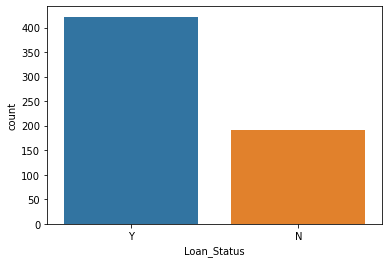

In [18]:
## Loan_Status
print(df.Loan_Status.value_counts(),"\n")
print(df.Loan_Status.value_counts(normalize=True),"\n")
sns.countplot(df.Loan_Status)

Seems our model is skewed target which is typically called imbalanced dataset. We will take care of it before model building.

# EDA:-

In [19]:
print(str_type)
def object_type(feature):
    plt.figure(figsize=(9,7))
    sns.countplot(df[feature])
    plt.xlabel(feature,fontsize=12)
    plt.tight_layout()

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


`Loan_ID` is a kind of identification number.It is not related with our target variable we will drop it later.


 
 As we can see that the popularity of male applicant is very high as compare to female applicant.||
There are more number of  male applying for loan as compare to female


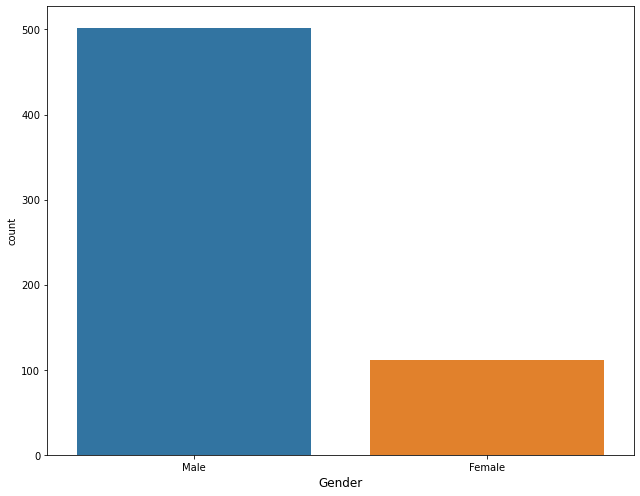

In [20]:
object_type('Gender')

print("\n \n As we can see that the popularity of male applicant is very high as compare to female applicant.||")
print("There are more number of  male applying for loan as compare to female")


 
 we can see that Married applicant is almost double of non married applicant
 there are more married applicants as compare to unmarried applicants.


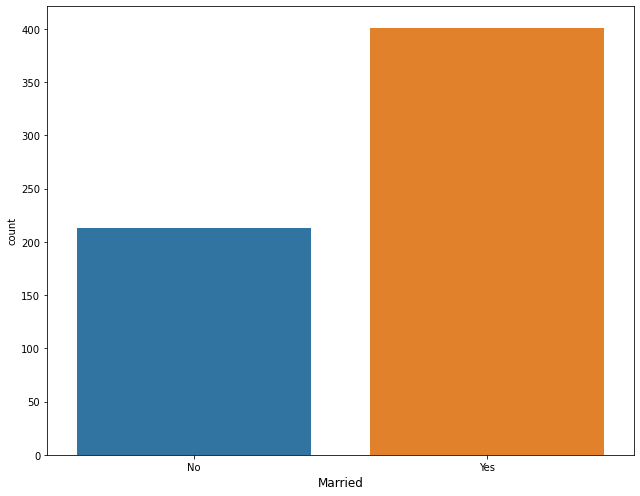

In [21]:
object_type('Married')
print("\n \n we can see that Married applicant is almost double of non married applicant")
print(" there are more married applicants as compare to unmarried applicants.")


Dependents '0' have majority as compare to '1','2','3+'


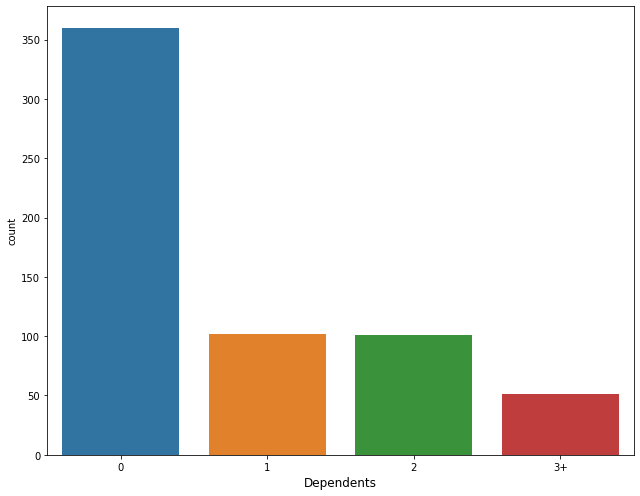

In [22]:
object_type('Dependents')
print("\nDependents '0' have majority as compare to '1','2','3+'")


 graducate aplicants have almost 3x majority of non graduate


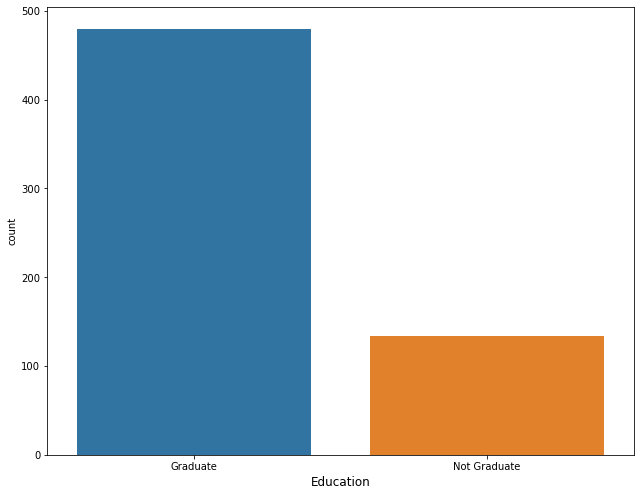

In [23]:
object_type('Education')
print("\n graducate aplicants have almost 3x majority of non graduate")

Non Self_employed have highest majority.


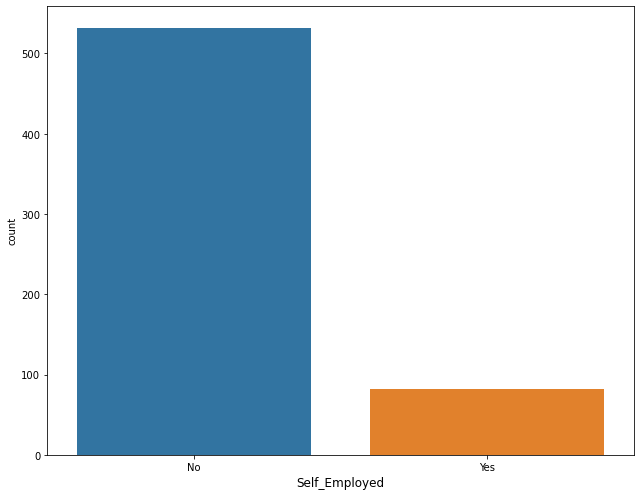

In [24]:
object_type("Self_Employed")
print("Non Self_employed have highest majority.")


 Semiurban has a majority but almost all the attributes of property area in the same range. 


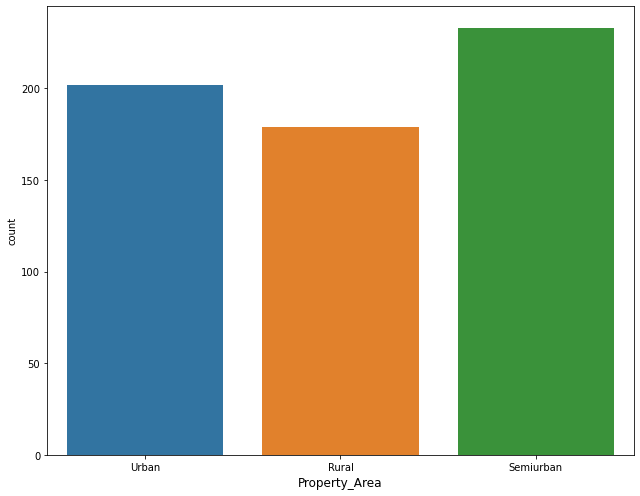

In [25]:
object_type("Property_Area")
print("\n Semiurban has a majority but almost all the attributes of property area in the same range. ")

## Loan Amount 

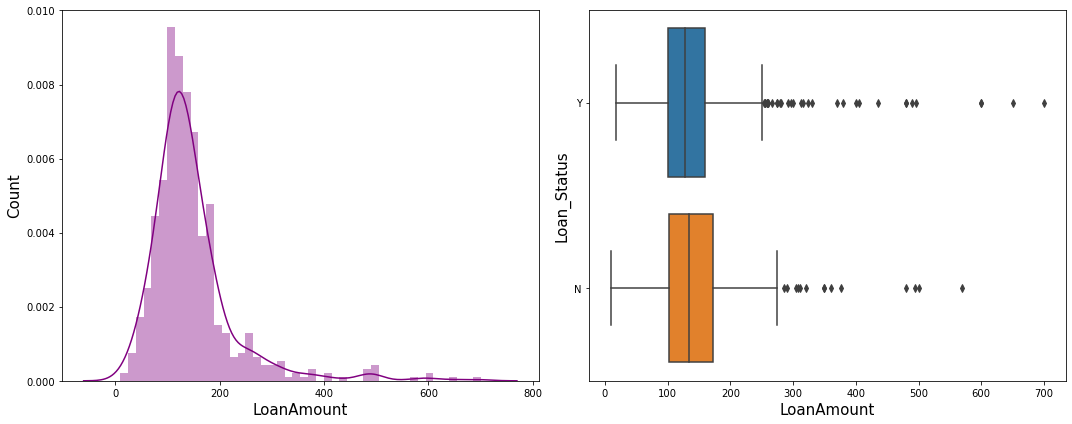

In [26]:
f, (ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.distplot(df.loc[df['LoanAmount'].notnull(),'LoanAmount'],kde=True,ax=ax1,color='purple')
ax1.set_xlabel('LoanAmount',fontsize=15)
ax1.set_ylabel('Count',fontsize=15)

sns.boxplot(x='LoanAmount',y='Loan_Status',data=df,ax=ax2)
ax2.set_xlabel('LoanAmount',fontsize=15)
ax2.set_ylabel("Loan_Status",fontsize=15)
plt.tight_layout()

- Loan amouunt is  highy right skewed. Seems there is some outliers present in my dataset.
- We observe that all loans are not unique, certain amount appear several times. Their may be  reason that compony  has some range or  certain amount to lend.

Text(0, 0.5, 'Proportion')

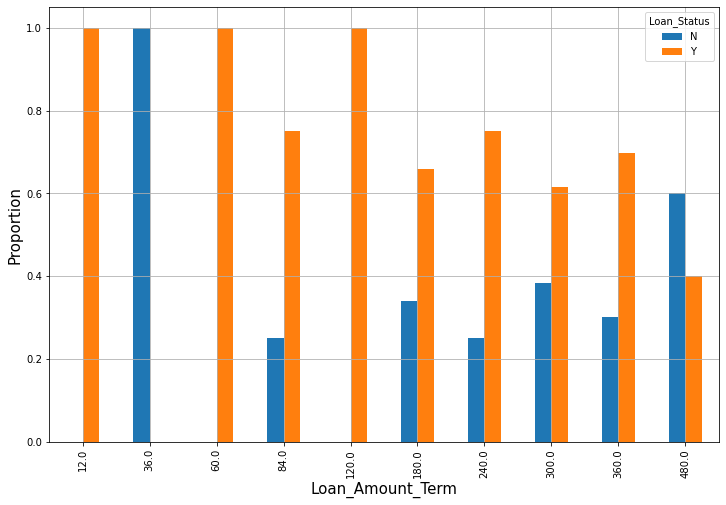

In [27]:
plt.rcParams["figure.figsize"]=(12,8)
pd.crosstab(columns=df['Loan_Status'],index=df['Loan_Amount_Term'],normalize='index').plot.bar(grid=True)
plt.xlabel('Loan_Amount_Term',fontsize=15)
plt.ylabel('Proportion',fontsize=15)

- Loan_Amount_Term '12' & '120' have 100% record for pass the loan approval.
- similarly loan amount term 36 has 100% record for fail the loan approaval.
- loan amount term 480 has majority for reject loan approval as compare to pass the loan approval.

## CoapplicantIncome

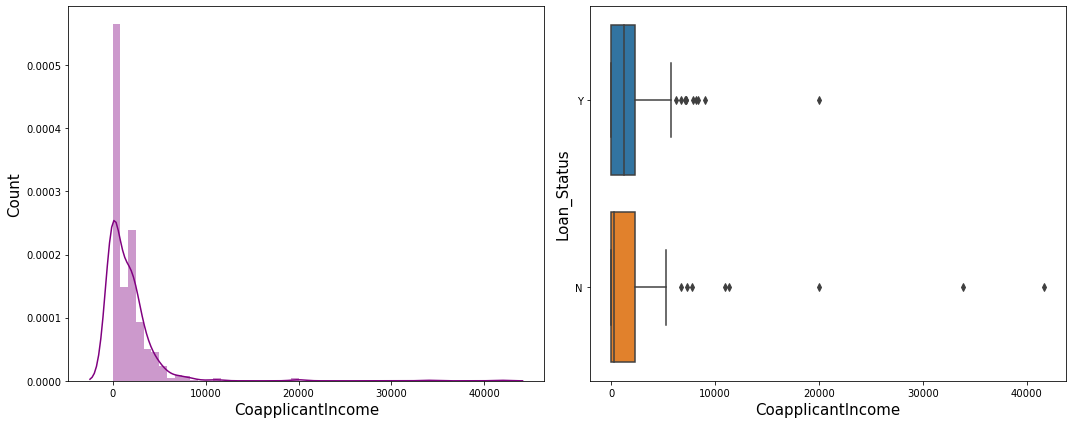

In [28]:
### comparing CoapplicantIncome
f, (ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.distplot(df.loc[df['CoapplicantIncome'].notnull(),'CoapplicantIncome'],kde=True,ax=ax1,color='purple')
ax1.set_xlabel('CoapplicantIncome',fontsize=15)
ax1.set_ylabel('Count',fontsize=15)

sns.boxplot(x='CoapplicantIncome',y='Loan_Status',data=df,ax=ax2)
ax2.set_xlabel('CoapplicantIncome',fontsize=15)
ax2.set_ylabel("Loan_Status",fontsize=15)
plt.tight_layout()

- We observe that CoapplicantIncome is highly skewed. We will use some power transformation technique to handle it.
- If coapplicantIncome is not directly relate for approve and reject the loan because both cases are in the same range in loan status.

## Applicant Income

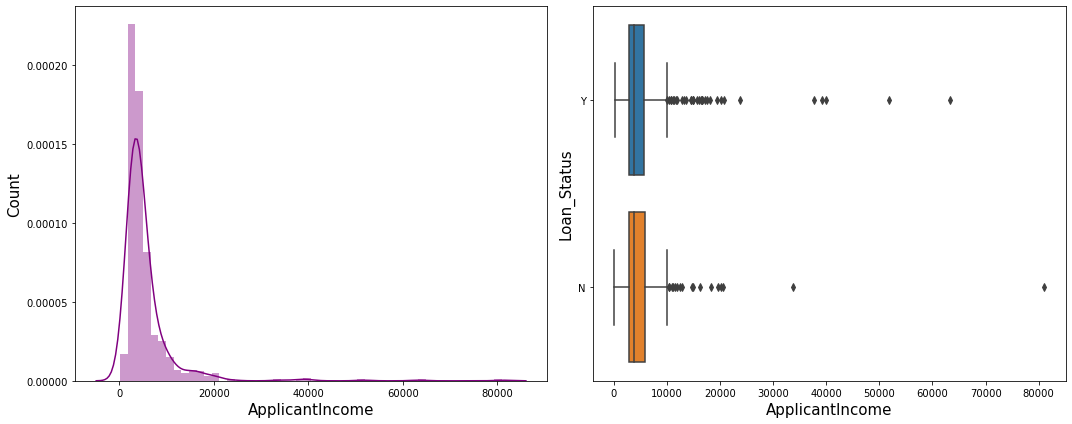

In [29]:
### comparing CoapplicantIncome
f, (ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.distplot(df.loc[df['ApplicantIncome'].notnull(),'ApplicantIncome'],kde=True,ax=ax1,color='purple')
ax1.set_xlabel('ApplicantIncome',fontsize=15)
ax1.set_ylabel('Count',fontsize=15)

sns.boxplot(x='ApplicantIncome',y='Loan_Status',data=df,ax=ax2)
ax2.set_xlabel('ApplicantIncome',fontsize=15)
ax2.set_ylabel("Loan_Status",fontsize=15)
plt.tight_layout()

- Applicant Income is also highly right skewed. we will handle  it using some transformation techniques.
- maximum applicants income fall in  the  range of 4000 to 9000.
- In second figure we  see that from only the  bases of  applicant's income we can  not  predict  the status  of loan. Because  the status in the same range.

### Relation between Applicant Income and CoapplicantIncome

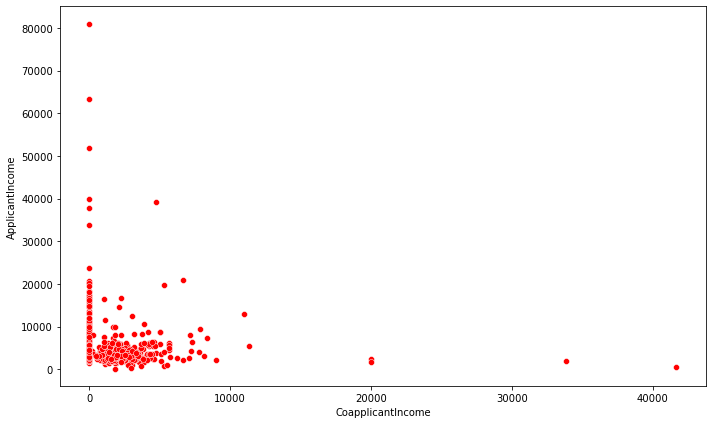

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CoapplicantIncome',y='ApplicantIncome',data=df,color='r')
ax2.set_xlabel('CoapplicantIncome',fontsize=15)
ax2.set_ylabel("ApplicantIncome",fontsize=15)
plt.tight_layout()

- We can not see there any up or down trend. It means that Applicant's income is not related to the  coapplicant's income.

### Relation Between applicant's Income and Loan Amount

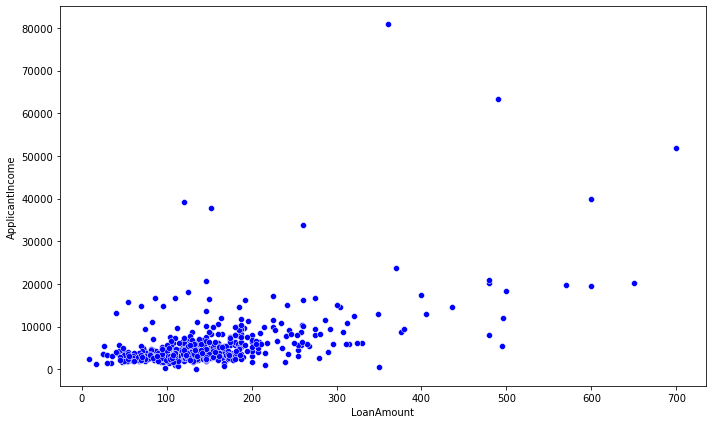

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=df,color='blue')
ax2.set_xlabel('LoanAmount',fontsize=20)
ax2.set_ylabel("ApplicantIncome",fontsize=20)
plt.tight_layout()

- applicant's Income and loan amount graph take some sense. We can see a kind of trend.
- But we can see that As loan amount is increasing but applicant's income is not increasing. It means that people take loan of different amount with same income.

### Categorical Features With Target.

Define a function for that.

In [32]:
print(str_type)
def object_relation(feature,target):
    plt.figure(figsize=(7,5))
    sns.countplot(df[feature],hue=df[target])
    plt.xlabel(feature,fontsize=15)
    plt.ylabel(target,fontsize=15)
    plt.tight_layout()

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


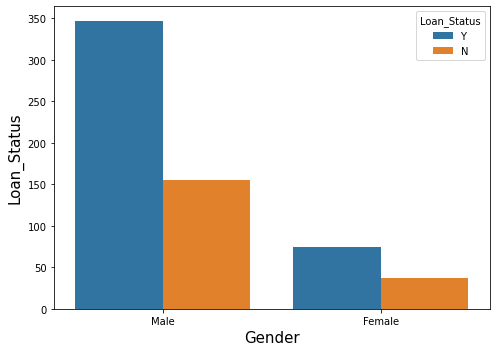

In [33]:
object_relation('Gender','Loan_Status')

- Loan Status is equally distributed for gender. Loan status approval is pass has majority for both male and female.

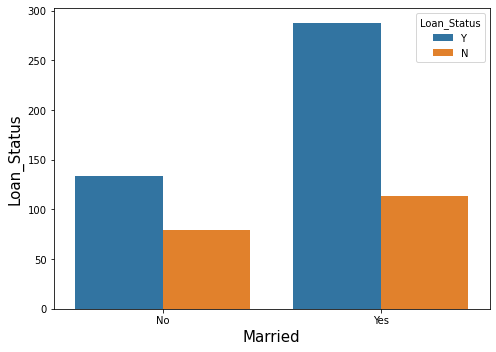

In [34]:
object_relation('Married','Loan_Status')

- Loan_status approval 'Pass' has majority as compare to loan staus 'fail'.

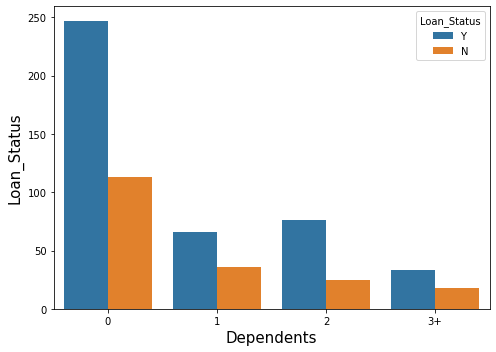

In [35]:
object_relation('Dependents','Loan_Status')

- zero Dependents has more chance to approve the loan.

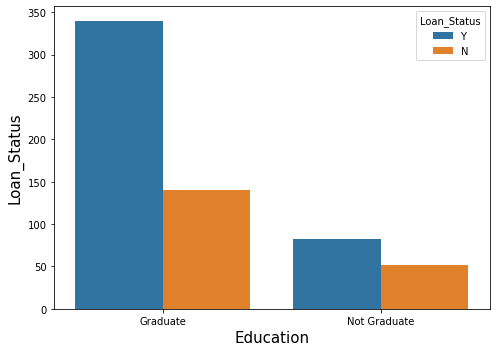

In [36]:
object_relation('Education','Loan_Status')

- there is high chance to get pass the loan if applicant is graducate.

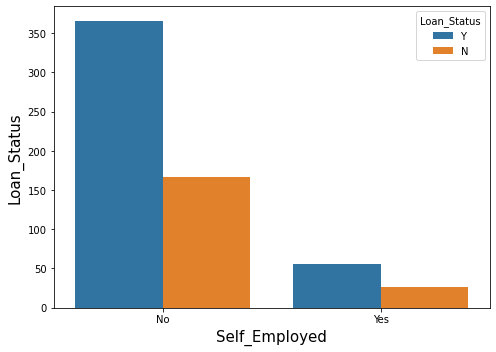

In [37]:
object_relation('Self_Employed','Loan_Status')

### Categorical features with LoanAmount.

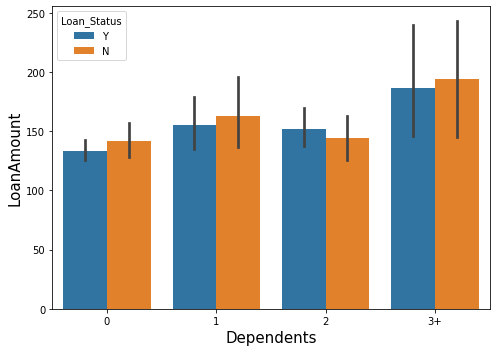

In [38]:
## Dependents with loanamount
plt.figure(figsize=(7,5))
sns.barplot(x=df['Dependents'],y=df['LoanAmount'],hue=df['Loan_Status'])
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('LoanAmount',fontsize=15)
plt.tight_layout()

- Dependents more then 3 have majority for average loan amount.

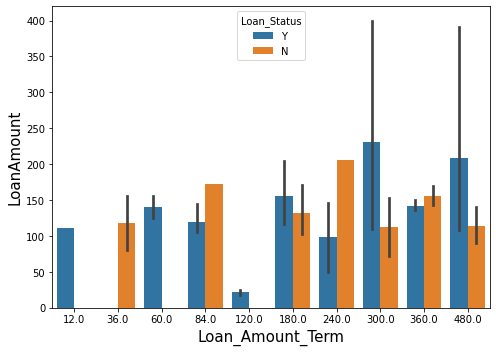

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Loan_Amount_Term'],y=df['LoanAmount'],hue=df['Loan_Status'])
plt.xlabel('Loan_Amount_Term',fontsize=15)
plt.ylabel('LoanAmount',fontsize=15)
plt.tight_layout()

## Applicant's Income with Dependents

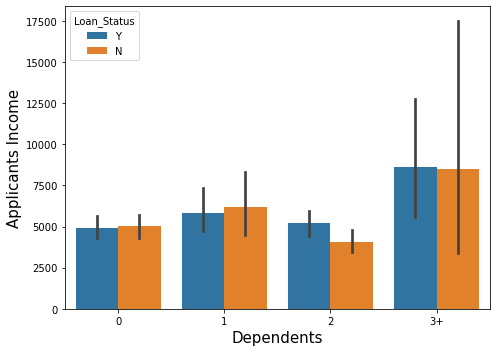

In [40]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Dependents'],y=df['ApplicantIncome'],hue=df['Loan_Status'])
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('Applicants Income',fontsize=15)
plt.tight_layout()

- Average income of dependents with 2 is less than with 1.

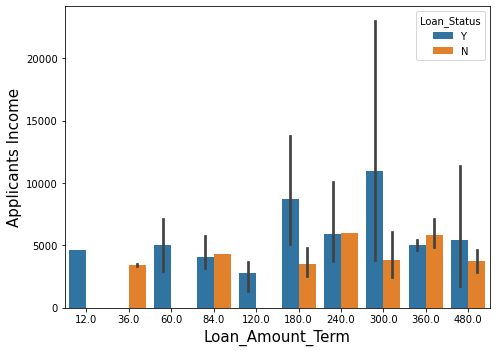

In [41]:
plt.figure(figsize=(7,5))
sns.barplot(x=df['Loan_Amount_Term'],y=df['ApplicantIncome'],hue=df['Loan_Status'])
plt.xlabel('Loan_Amount_Term',fontsize=15)
plt.ylabel('Applicants Income',fontsize=15)
plt.tight_layout()

- applicants under loan amount term 300 having highest income.

### Checking outlier:-
Let's drop Loan_ID feature first.

In [42]:
df.drop('Loan_ID',axis=1,inplace=True)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


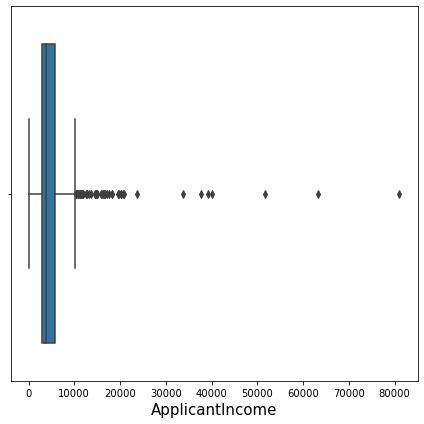

In [43]:
### Chekcing outlier for applicant's income
plt.figure(figsize=(6,6))
sns.boxplot(df['ApplicantIncome'])
plt.xlabel('ApplicantIncome',fontsize=15)
plt.tight_layout()

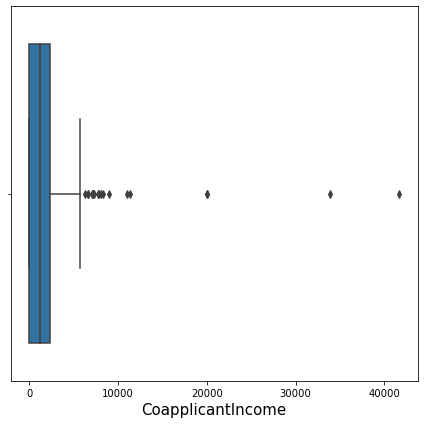

In [44]:
### Chekcing outlier for Coapplicant's income
plt.figure(figsize=(6,6))
sns.boxplot(df['CoapplicantIncome'])
plt.xlabel('CoapplicantIncome',fontsize=15)
plt.tight_layout()

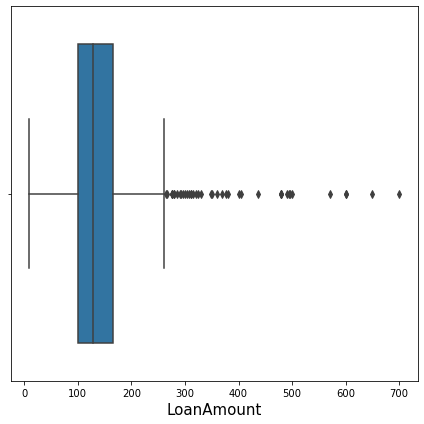

In [45]:
### Chekcing outlier for Loan amount
plt.figure(figsize=(6,6))
sns.boxplot(df['LoanAmount'])
plt.xlabel('LoanAmount',fontsize=15)
plt.tight_layout()

- we will check outlier only for continuous data.
- We have only three features having continuous  data. All of them having good amount of outlier present.

Let's handle those outliers.
## Handling outliers using zscore:-

In [46]:
from scipy.stats import zscore
z_score=zscore(df[['LoanAmount','ApplicantIncome','CoapplicantIncome']])
abs_zscore=np.abs(z_score)

In [47]:
new_entry=(abs_zscore<3).all(axis=1)
df_new=df[new_entry]
print("The shape before: ", df.shape)
print("The shape after: ",df_new.shape)

The shape before:  (614, 12)
The shape after:  (589, 12)


## Data Loss

In [48]:
loss=(614-589)/614*100
print("for removing the  outliers our data loss is : ",loss)
print("\nData loss in acceptable range. Let's go ahead")

for removing the  outliers our data loss is :  4.071661237785016

Data loss in acceptable range. Let's go ahead


### Plotting heatmap:-

- first encode the  label for better understanding.

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df_new['Loan_Status']=le.fit_transform(df_new['Loan_Status'].values.reshape(-1,1))
df_new['Gender']=le.fit_transform(df_new['Gender'].values.reshape(-1,1))
df_new['Education']=le.fit_transform(df_new['Education'].values.reshape(-1,1))
df_new['Self_Employed']=le.fit_transform(df_new['Self_Employed'].values.reshape(-1,1))
df_new['Married']=le.fit_transform(df_new['Married'].values.reshape(-1,1))

df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1


<Figure size 720x720 with 0 Axes>

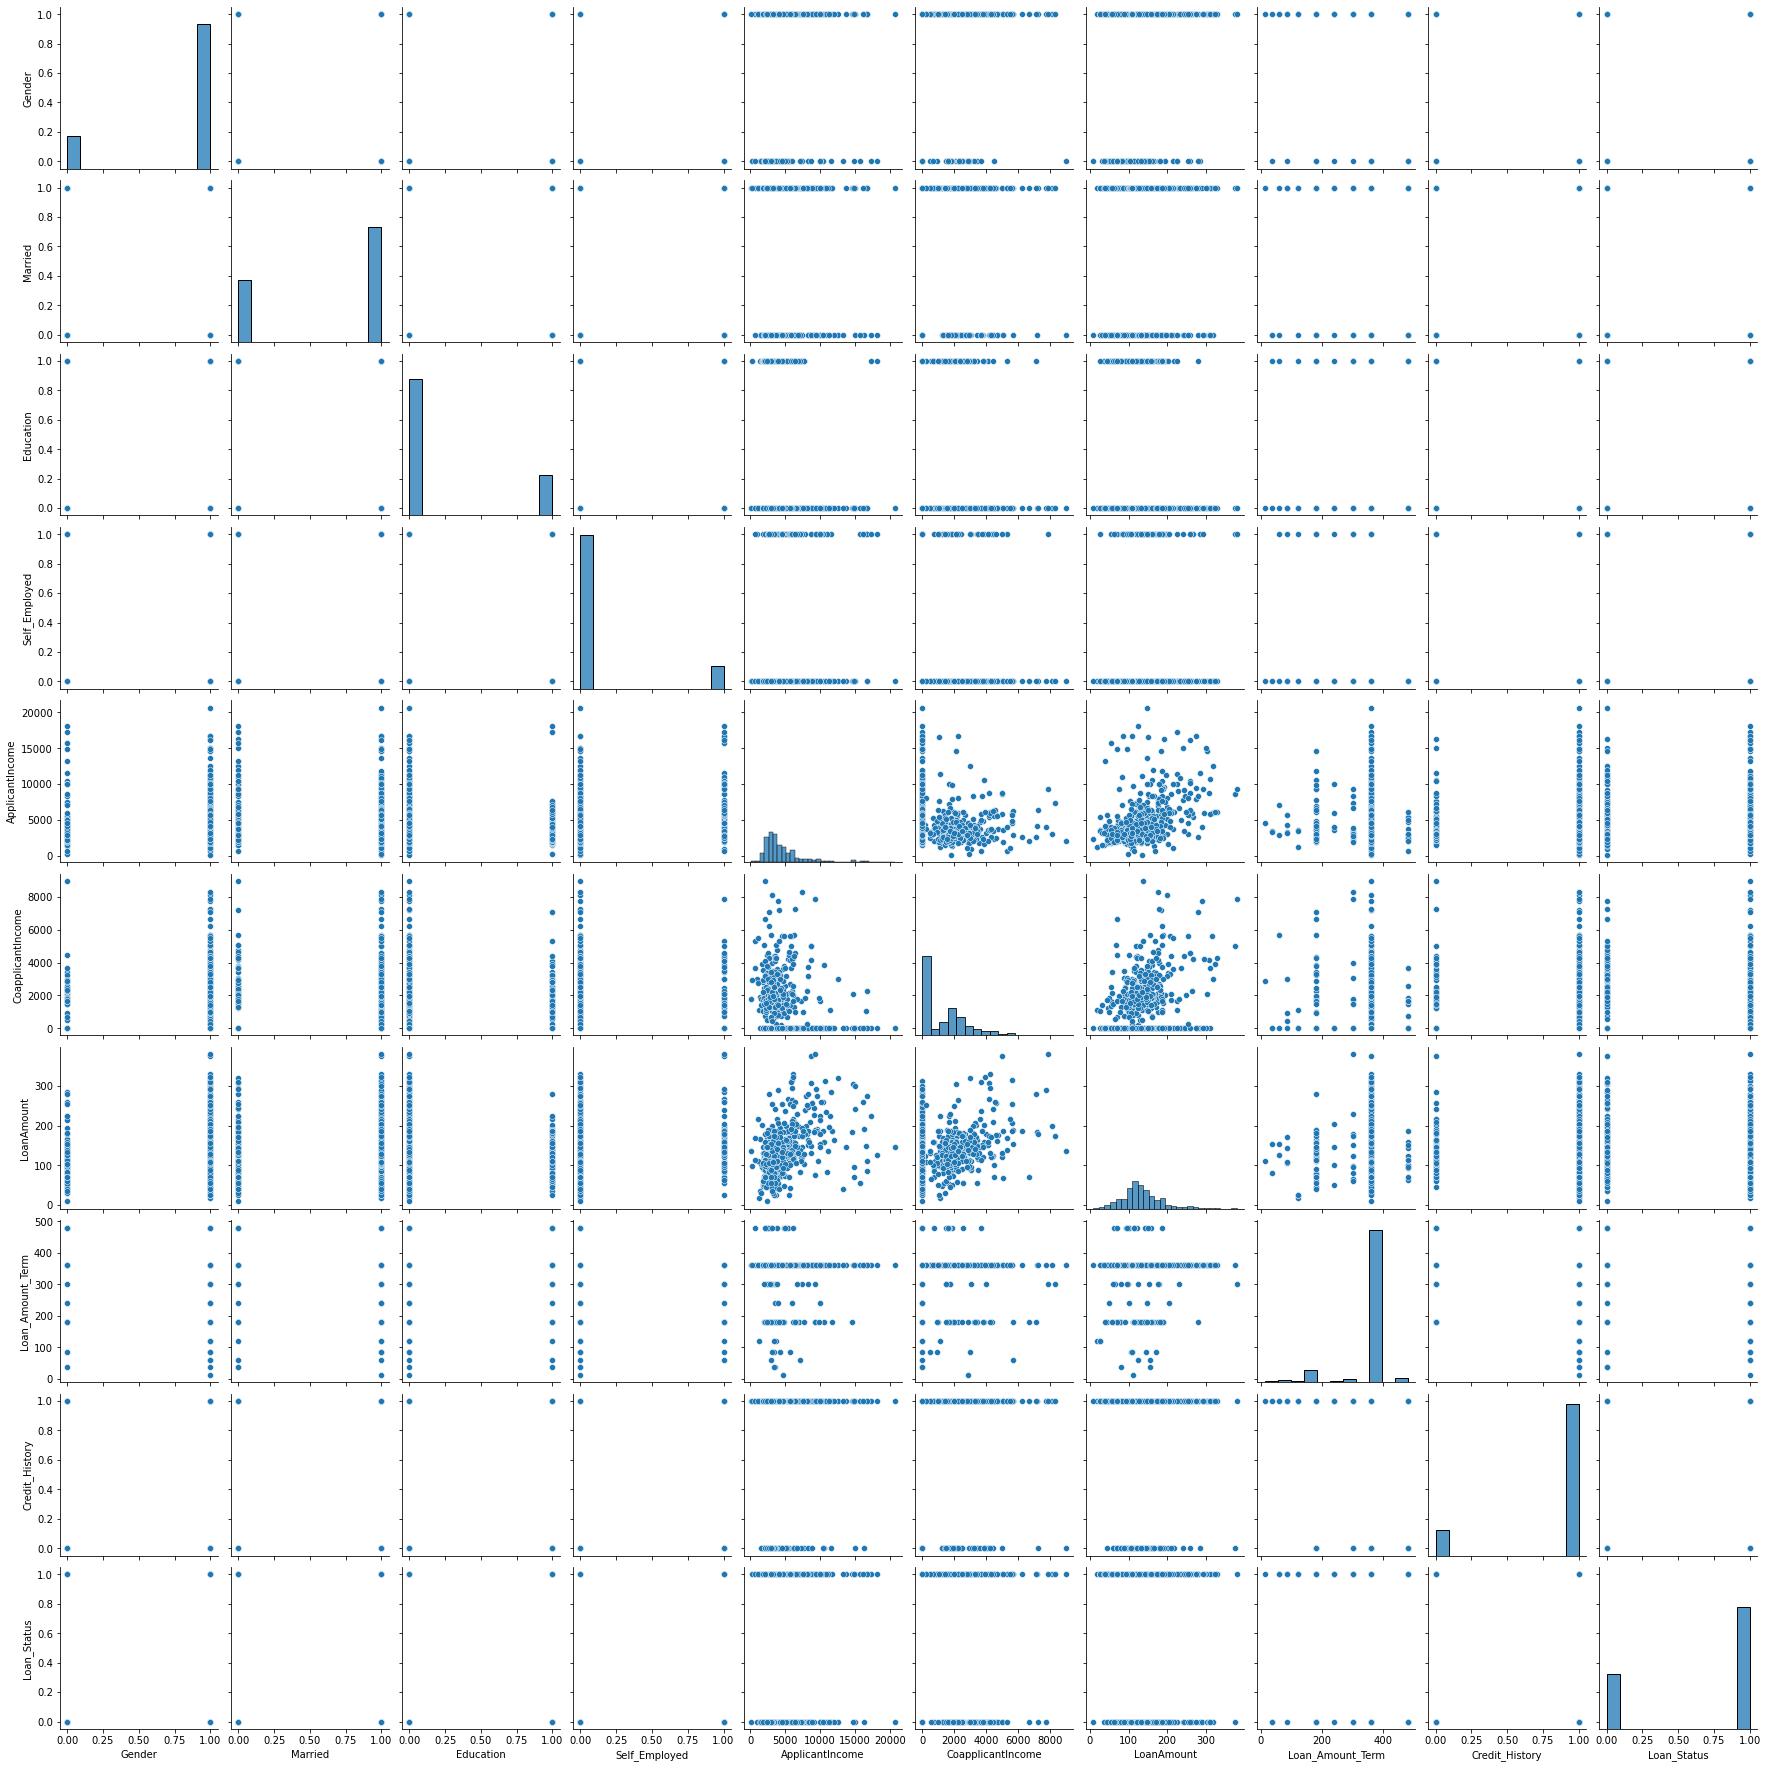

In [52]:
### plotting pair plot
plt.figure(figsize=(10,10))
sns.pairplot(df_new,diag_kind='hist')
plt.xticks(rotation=90,fontsize=20)
plt.yticks(rotation=90,fontsize=20)
plt.show()

- Seems loan amount , Applicant_income,and coapplicant's income is reated with each other. 

let's plot heatmap first:- 
### plotting heatmap

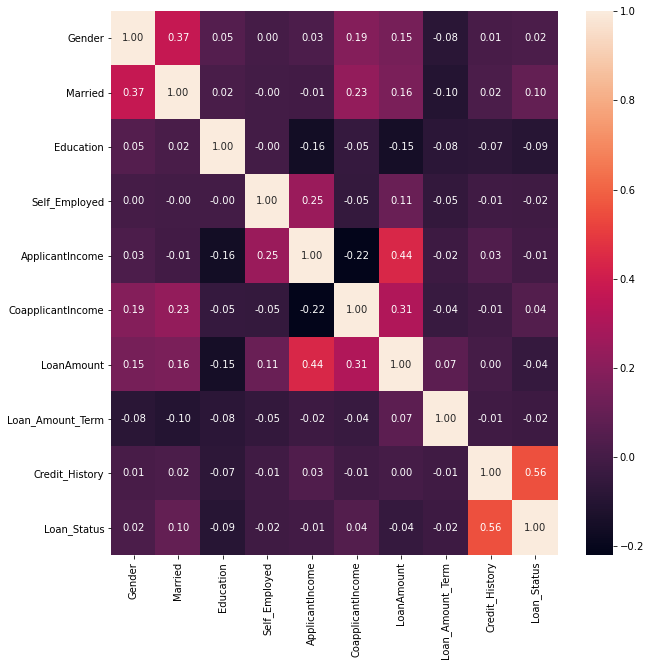

In [53]:
## plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,fmt='.2f',linecolor='r')
plt.show()


### Observations:-
- Target variable Loan_Status is highest correalted with Credit_History which make sense.
- `Education`,`Self_Employed`,`ApplicantIncome`,`LoanAmount` and `Loan_Amount_Team` features are negatively correlated with our target variable.
- `Gender`,`married` , `CoapplicantIncome` and `Credit_History` is positively correlated with target varibel.
- In feature vs feature, `ApplicantIncome` and `LoanAmount` is highest correlate with 44 %.

### Encoding Feature with get-dummies:-
we will create dummies for Loan Amount term feature.

In [54]:
df_new.Loan_Amount_Term=df_new.Loan_Amount_Term.astype('object')
print(df_new.dtypes)
df1=pd.get_dummies(df_new[['Dependents','Loan_Amount_Term','Property_Area']])


Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object


In [55]:
df1

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
610,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
611,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
612,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [56]:
### joining the dataframes
df=df_new.join(df1)
df.drop(columns=['Dependents','Loan_Amount_Term','Property_Area'],inplace=True)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,...,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,146.412162,1.0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,1,1,0,0,4583,1508.0,128.000000,1.0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,1,0,1,3000,0.0,66.000000,1.0,1,1,...,0,0,0,0,0,1,0,0,0,1
3,1,1,1,0,2583,2358.0,120.000000,1.0,1,1,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,6000,0.0,141.000000,1.0,1,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,1.0,1,1,...,0,0,0,0,0,1,0,1,0,0
610,1,1,0,0,4106,0.0,40.000000,1.0,1,0,...,0,0,1,0,0,0,0,1,0,0
611,1,1,0,0,8072,240.0,253.000000,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1
612,1,1,0,0,7583,0.0,187.000000,1.0,1,0,...,0,0,0,0,0,1,0,0,0,1


## Correlation with Target:-

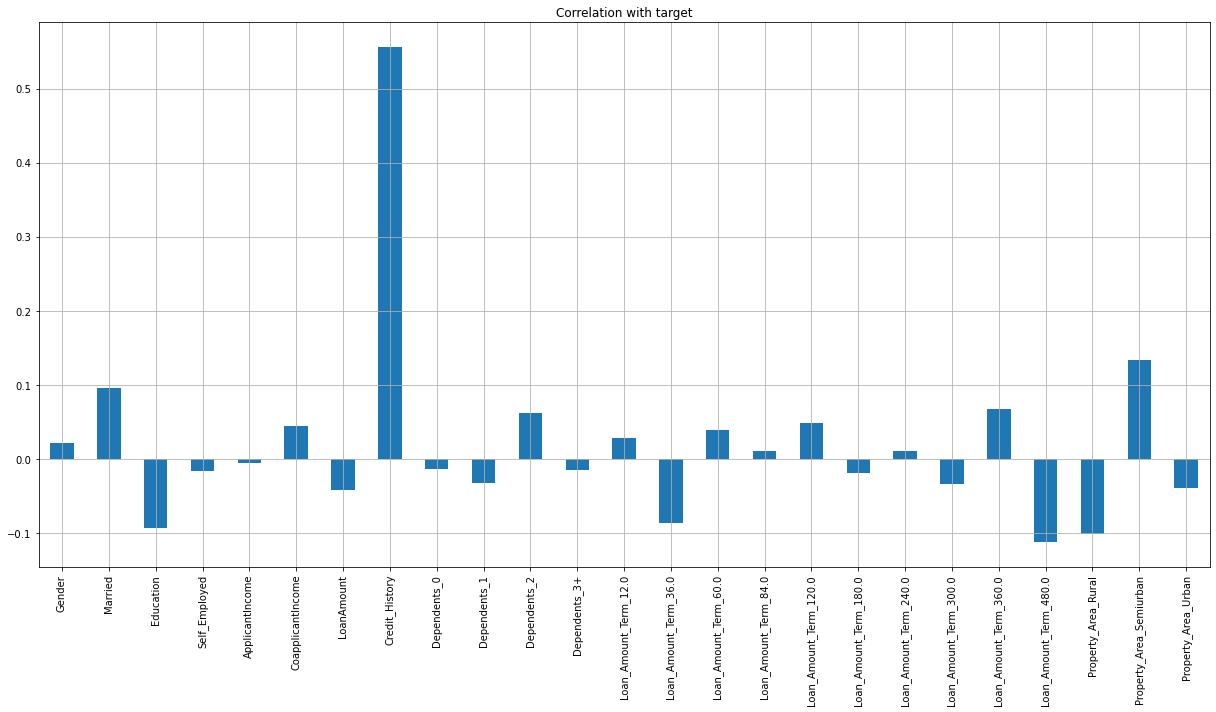

In [57]:
df.drop('Loan_Status',axis=1).corrwith(df.Loan_Status).plot(kind='bar',grid=True,figsize=(17,10),title='Correlation with target')
plt.tight_layout()

- Note that some features are positively correlated with target variable and some are negatively as wel..
- Except Credit-History all features are correlate with target in the same range.

So We will use select percentile to get top 80% features.

## Feature Selection:-


In [58]:
from sklearn.feature_selection import SelectPercentile as sp
from sklearn.feature_selection import chi2


In [59]:
### Splitting the dataset
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
print(x.isna().sum())
print(y.isna().sum())

Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Credit_History             0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Loan_Amount_Term_12.0      0
Loan_Amount_Term_36.0      0
Loan_Amount_Term_60.0      0
Loan_Amount_Term_84.0      0
Loan_Amount_Term_120.0     0
Loan_Amount_Term_180.0     0
Loan_Amount_Term_240.0     0
Loan_Amount_Term_300.0     0
Loan_Amount_Term_360.0     0
Loan_Amount_Term_480.0     0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64
0


In [60]:
SPercentile=sp(score_func=chi2,percentile=80)
SPercentile.fit(x,y)
### Separate the features to check p_values:-
column=SPercentile.get_support(indices=True)
features=x.columns[column]

In [61]:
df_score=pd.DataFrame({'feature':x.columns,
                      'chi2Score':SPercentile.scores_,
                      'p_value':SPercentile.pvalues_}).sort_values(by='chi2Score',ascending=False)

In [62]:
df_score

,feature,chi2Score,p_value
5,CoapplicantIncome,2280.368362,0.000000e+00
4,ApplicantIncome,27.879772,1.290923e-07
7,Credit_History,26.576911,2.532523e-07
6,LoanAmount,25.169364,5.250976e-07
21,Loan_Amount_Term_480.0,7.308337,6.863540e-03
23,Property_Area_Semiurban,6.533108,1.058848e-02
13,Loan_Amount_Term_36.0,4.472527,3.444400e-02
22,Property_Area_Rural,4.259336,3.903518e-02
2,Education,3.922822,4.763486e-02
10,Dependents_2,1.885869,1.696686e-01


### printing top 80% features:-

In [63]:
print(column)
print(features)

[ 1  2  3  4  5  6  7  9 10 12 13 14 16 17 19 20 21 22 23 24]
Index(['Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Dependents_1',
       'Dependents_2', 'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_120.0',
       'Loan_Amount_Term_180.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [64]:
## create subset of selected features
X=df[features]
Y=df.Loan_Status

In [65]:
X

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Dependents_1,Dependents_2,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,5849,0.0,146.412162,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,4583,1508.0,128.000000,1.0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,1,3000,0.0,66.000000,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,2583,2358.0,120.000000,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,6000,0.0,141.000000,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.000000,1.0,0,0,0,0,0,0,0,0,1,0,1,0,0
610,1,0,0,4106,0.0,40.000000,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
611,1,0,0,8072,240.0,253.000000,1.0,1,0,0,0,0,0,0,0,1,0,0,0,1
612,1,0,0,7583,0.0,187.000000,1.0,0,1,0,0,0,0,0,0,1,0,0,0,1


### Checking Skewness:-

In [66]:
X.skew()

Married                    -0.631755
Education                   1.303332
Self_Employed               2.218831
ApplicantIncome             2.164762
CoapplicantIncome           1.353191
LoanAmount                  1.076221
Credit_History             -2.010069
Dependents_1                1.829530
Dependents_2                1.796168
Loan_Amount_Term_12.0      24.269322
Loan_Amount_Term_36.0      17.117094
Loan_Amount_Term_60.0      17.117094
Loan_Amount_Term_120.0     13.940146
Loan_Amount_Term_180.0      3.391048
Loan_Amount_Term_300.0      6.807351
Loan_Amount_Term_360.0     -2.069352
Loan_Amount_Term_480.0      6.268637
Property_Area_Rural         0.908123
Property_Area_Semiurban     0.509292
Property_Area_Urban         0.727956
dtype: float64

In [67]:
skewed_col=['ApplicantIncome','CoapplicantIncome','LoanAmount']
from sklearn.preprocessing import PowerTransformer
for i in skewed_col:
    X[i]=np.cbrt(X[i].values.reshape(-1,1))

In [68]:
X.skew()

Married                    -0.631755
Education                   1.303332
Self_Employed               2.218831
ApplicantIncome             0.848471
CoapplicantIncome          -0.030379
LoanAmount                 -0.098485
Credit_History             -2.010069
Dependents_1                1.829530
Dependents_2                1.796168
Loan_Amount_Term_12.0      24.269322
Loan_Amount_Term_36.0      17.117094
Loan_Amount_Term_60.0      17.117094
Loan_Amount_Term_120.0     13.940146
Loan_Amount_Term_180.0      3.391048
Loan_Amount_Term_300.0      6.807351
Loan_Amount_Term_360.0     -2.069352
Loan_Amount_Term_480.0      6.268637
Property_Area_Rural         0.908123
Property_Area_Semiurban     0.509292
Property_Area_Urban         0.727956
dtype: float64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

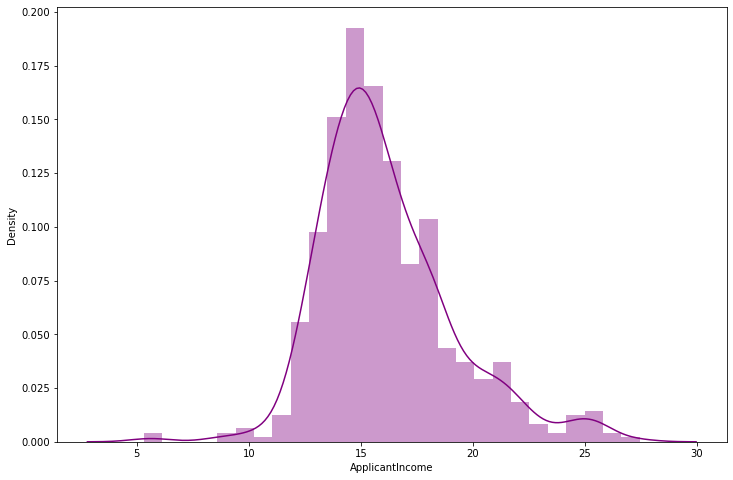

In [69]:
sns.distplot(X['ApplicantIncome'],kde=True,color='purple')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

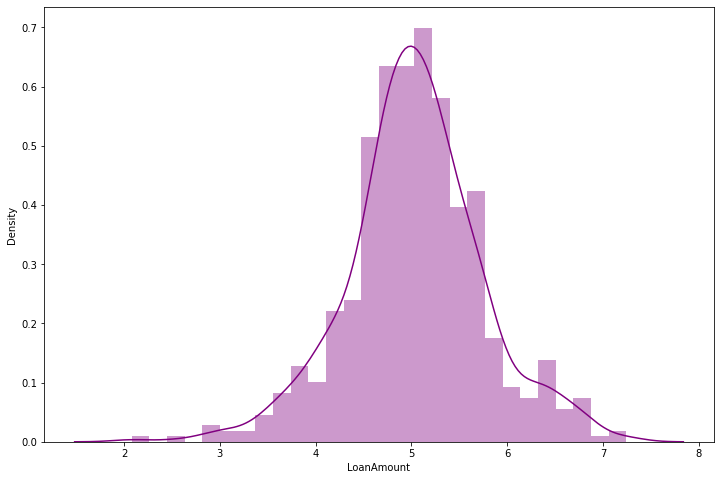

In [70]:
sns.distplot(X['LoanAmount'],kde=True,color='purple')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

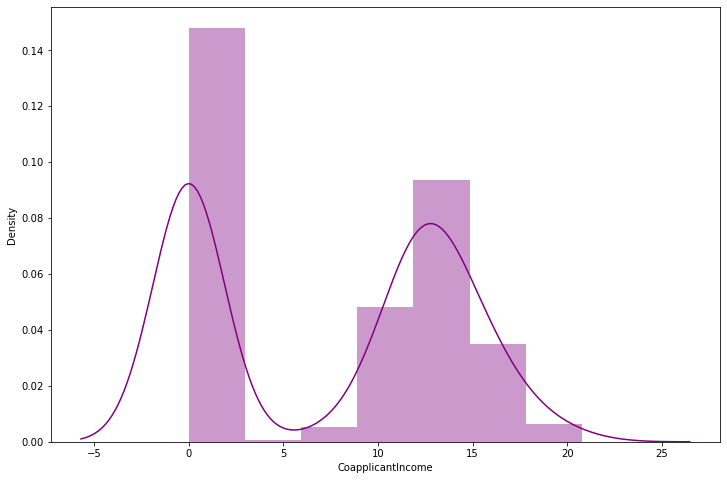

In [71]:
sns.distplot(X['CoapplicantIncome'],kde=True,color='purple')

We have successfully handle the skeeness.
Let's Scale the data before model building.

### Scaling 

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [73]:
for  i in X.columns:
    X[i]=scaler.fit_transform(X[i].values.reshape(-1,1))
X

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Dependents_1,Dependents_2,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,0.0,0.574088,0.000000,0.617947,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.510509,0.551707,0.573225,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.411635,0.000000,0.379843,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.379919,0.640357,0.552450,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.581035,0.000000,0.605210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.404311,0.000000,0.399129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
610,1.0,0.0,0.0,0.483508,0.000000,0.259510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
611,1.0,0.0,0.0,0.666379,0.298982,0.822111,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
612,1.0,0.0,0.0,0.647692,0.000000,0.704696,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Model Building:-

#### handle Imbalanced Data Using SMOTE

In [74]:
### importing the somte
from imblearn.over_sampling import SMOTE
sm=SMOTE(80)

In [75]:
### importing Train Test Split
from sklearn.model_selection import train_test_split as tts

In [76]:
### importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [77]:
### importing metrics
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,roc_auc_score

### Define a function for finding the best random State:

In [83]:
def randomstate(model,features,target):
    maximum=0
    for i in range(1,201):
        x_train,x_test,y_train,y_test=tts(features,target,test_size=0.25,random_state=i)
        sm=SMOTE(0.80)
        x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
        model.fit(x_train_new,y_train_new)
        train_pred=model.predict(x_train)
        test_pred=model.predict(x_test)
        roc_score=roc_auc_score(y_test,test_pred)
        print("\n for random state {} , ROC Score is {}: ".format(i,roc_score))
        if roc_score>maximum:
            maximum=roc_score
            j=i
    print("\n The best Random State is {} , the crossponding roc score is {} ".format(j,maximum))
    return j

## Define a function for Printing Scores:


In [79]:
def print_score(Model,independent,dependent,state,train=True):
    x_train,x_test,y_train,y_test=tts(independent,dependent,test_size=0.25,random_state=state)
    sm=SMOTE(0.80)
    x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
    Model.fit(x_train_new,y_train_new)
    train_pred=Model.predict(x_train)
    test_pred=Model.predict(x_test)
    if train:
        prediction=Model.predict(x_train_new)
        print('After Oversampling the  new shape of Xtrain is : ',x_train_new.shape)
        print("After oversampling the new shape of Ytrain is : ",y_train_new.shape)
        print("\n********************Traning Scores****************************\n")
        print("Accuracy Score is {} for Training Model.".format(accuracy_score(y_train_new,prediction)))
        print("\n F1 Score for the model is : \n", f1_score(y_train_new,prediction))
        print("\n*******************Confusion Matrix***************************\n")
        print(confusion_matrix(y_train_new,prediction))
        print("\n\n Training Classification Report \n",classification_report(y_train_new,prediction))
    
    if train==False:
        pred=Model.predict(x_test)
        print("\n\n")
        print("***********************Testing Scores******************************\n")
        print("Accuracy score for testing is : ", accuracy_score(y_test,pred))
        print("\n F1 Score for testing is : ", f1_score(y_test,pred))
        matrix=confusion_matrix(y_test,pred)
        print("Confusion Matrix : \n",matrix)
        true_positive=matrix[0][0]
        false_positive=matrix[0][1]
        false_negative=matrix[1][0]
        true_negative=matrix[1][1]
        print("True positives are :- " ,true_positive)
        print("False positives are :- " ,false_positive)
        print("False negatives are :- " ,false_negative)
        print("True negatives are :- " ,true_negative)
        print("\n The Classification report for Testing \n", classification_report(y_test,pred))
        
        

## Define a Function for Cross Validation:


In [80]:
from sklearn.model_selection import cross_val_score 

In [81]:
def cross_val(clf,col1,col2,state):
    x_train,x_test,y_train,y_test=tts(col1,col2,test_size=0.25,random_state=state)
    sm=SMOTE(0.80)
    x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
    clf.fit(x_train_new,y_train_new)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    for i in range(2,21):
        cv_score=cross_val_score(clf,X,Y,cv=i)
        cv_mean=cv_score.mean()
        print("\nfor CV = {}, the cross validation score of the model is {}. And accuracy Score is {} ".format(i,cv_mean,accuracy_score(y_test,pred_test)))
        print("\n The difference between corss val score and Accuaracy score is : ", cv_mean-accuracy_score(y_test,pred_test))   

## Logistic Regression:-

In [84]:
### Random State for LogisticRegression:-
randomstate(LogisticRegression(),X,Y)


 for random state 1 , ROC Score is 0.7341085271317831: 

 for random state 2 , ROC Score is 0.7462500000000001: 

 for random state 3 , ROC Score is 0.6427899317807575: 

 for random state 4 , ROC Score is 0.7542857142857144: 

 for random state 5 , ROC Score is 0.6648697214734951: 

 for random state 6 , ROC Score is 0.7023237179487178: 

 for random state 7 , ROC Score is 0.718772053634439: 

 for random state 8 , ROC Score is 0.7412500000000001: 

 for random state 9 , ROC Score is 0.7233391608391608: 

 for random state 10 , ROC Score is 0.7259615384615384: 

 for random state 11 , ROC Score is 0.7111378205128206: 

 for random state 12 , ROC Score is 0.7646455436516983: 

 for random state 13 , ROC Score is 0.7482949701619779: 

 for random state 14 , ROC Score is 0.6848976711362033: 

 for random state 15 , ROC Score is 0.6867256637168142: 

 for random state 16 , ROC Score is 0.7597626752966558: 

 for random state 17 , ROC Score is 0.6890451832907076: 

 for random state 18 , 

55

In [85]:
### printing Score with random state 55
print(print_score(LogisticRegression(),X,Y,55,train=True))
print(print_score(LogisticRegression(),X,Y,55,train=False))

After Oversampling the  new shape of Xtrain is :  (563, 20)
After oversampling the new shape of Ytrain is :  (563,)

********************Traning Scores****************************

Accuracy Score is 0.7300177619893428 for Training Model.

 F1 Score for the model is : 
 0.7847025495750707

*******************Confusion Matrix***************************

[[134 116]
 [ 36 277]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.54      0.64       250
           1       0.70      0.88      0.78       313

    accuracy                           0.73       563
   macro avg       0.75      0.71      0.71       563
weighted avg       0.74      0.73      0.72       563

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.831081081081081

 F1 Score for testing is :  0.878048780487805
Confusion Matrix : 
 [[33 21]
 [ 4 90]]
True positives are :-  33
False positives are

### Cross Validation for Logistic Regression:-

In [86]:
cross_val(LogisticRegression(),X,Y,55)


for CV = 2, the cross validation score of the model is 0.8149602213766862. And accuracy Score is 0.8378378378378378 

 The difference between corss val score and Accuaracy score is :  -0.022877616461151606

for CV = 3, the cross validation score of the model is 0.8149539003418625. And accuracy Score is 0.8378378378378378 

 The difference between corss val score and Accuaracy score is :  -0.02288393749597528

for CV = 4, the cross validation score of the model is 0.8149476006618863. And accuracy Score is 0.8378378378378378 

 The difference between corss val score and Accuaracy score is :  -0.02289023717595151

for CV = 5, the cross validation score of the model is 0.8183398522381573. And accuracy Score is 0.8378378378378378 

 The difference between corss val score and Accuaracy score is :  -0.019497985599680523

for CV = 6, the cross validation score of the model is 0.8166185666185665. And accuracy Score is 0.8378378378378378 

 The difference between corss val score and Accuaracy s

- We can see that our model get litte bit over fitted. At Cv=5 the difference between Cross val score and accuracy score is very less. So CV=5 Selected.
- Best Random State= 55

# KNN Model:-

In [87]:
### Random State for KNN:-
randomstate(KNeighborsClassifier(),X,Y)


 for random state 1 , ROC Score is 0.7192691029900331: 

 for random state 2 , ROC Score is 0.7016666666666667: 

 for random state 3 , ROC Score is 0.6334980004704776: 

 for random state 4 , ROC Score is 0.7238775510204082: 

 for random state 5 , ROC Score is 0.6365678346810423: 

 for random state 6 , ROC Score is 0.6674679487179487: 

 for random state 7 , ROC Score is 0.6830157609974123: 

 for random state 8 , ROC Score is 0.6904166666666666: 

 for random state 9 , ROC Score is 0.6826923076923077: 

 for random state 10 , ROC Score is 0.6569055944055945: 

 for random state 11 , ROC Score is 0.6554487179487178: 

 for random state 12 , ROC Score is 0.6579667198541144: 

 for random state 13 , ROC Score is 0.6575021312872975: 

 for random state 14 , ROC Score is 0.6472594683603858: 

 for random state 15 , ROC Score is 0.6346396965865992: 

 for random state 16 , ROC Score is 0.68554476806904: 

 for random state 17 , ROC Score is 0.6634697357203752: 

 for random state 18 , R

126

In [88]:
### printing Score with random state 126
print(print_score(KNeighborsClassifier(),X,Y,126,train=True))
print(print_score(KNeighborsClassifier(),X,Y,126,train=False))

After Oversampling the  new shape of Xtrain is :  (540, 20)
After oversampling the new shape of Ytrain is :  (540,)

********************Traning Scores****************************

Accuracy Score is 0.8333333333333334 for Training Model.

 F1 Score for the model is : 
 0.8611111111111112

*******************Confusion Matrix***************************

[[171  69]
 [ 21 279]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.71      0.79       240
           1       0.80      0.93      0.86       300

    accuracy                           0.83       540
   macro avg       0.85      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7635135135135135

 F1 Score for testing is :  0.8356807511737089
Confusion Matrix : 
 [[24 17]
 [18 89]]
True positives are :-  24
False positives a

## Cross Validation for KNN:-

In [89]:
cross_val(KNeighborsClassifier(),X,Y,126)


for CV = 2, the cross validation score of the model is 0.7469733656174334. And accuracy Score is 0.7635135135135135 

 The difference between corss val score and Accuaracy score is :  -0.01654014789608005

for CV = 3, the cross validation score of the model is 0.7724714251182707. And accuracy Score is 0.7635135135135135 

 The difference between corss val score and Accuaracy score is :  0.00895791160475723

for CV = 4, the cross validation score of the model is 0.7758664276521421. And accuracy Score is 0.7635135135135135 

 The difference between corss val score and Accuaracy score is :  0.012352914138628601

for CV = 5, the cross validation score of the model is 0.7878458641170506. And accuracy Score is 0.7635135135135135 

 The difference between corss val score and Accuaracy score is :  0.024332350603537112

for CV = 6, the cross validation score of the model is 0.7792551363979935. And accuracy Score is 0.7635135135135135 

 The difference between corss val score and Accuaracy scor

- We can see that our model get litte bit over fitted. At Cv=11 the difference between Cross val score and accuracy score is very less. So CV=11 Selected.
- Best Random State= 126

# DecisionTree:-

In [90]:
### Random State for DecisionTree:-
randomstate(DecisionTreeClassifier(),X,Y)


 for random state 1 , ROC Score is 0.6722037652270211: 

 for random state 2 , ROC Score is 0.7229166666666667: 

 for random state 3 , ROC Score is 0.6591390261115031: 

 for random state 4 , ROC Score is 0.7228571428571428: 

 for random state 5 , ROC Score is 0.6442048517520215: 

 for random state 6 , ROC Score is 0.6554487179487178: 

 for random state 7 , ROC Score is 0.6857210068219243: 

 for random state 8 , ROC Score is 0.6824999999999999: 

 for random state 9 , ROC Score is 0.6765734265734266: 

 for random state 10 , ROC Score is 0.6735139860139859: 

 for random state 11 , ROC Score is 0.5981570512820513: 

 for random state 12 , ROC Score is 0.6683382721677684: 

 for random state 13 , ROC Score is 0.653452685421995: 

 for random state 14 , ROC Score is 0.5876264408374501: 

 for random state 15 , ROC Score is 0.6982300884955752: 

 for random state 16 , ROC Score is 0.6974110032362462: 

 for random state 17 , ROC Score is 0.6344842284739982: 

 for random state 18 , 

96

In [96]:
### printing Score with random state 96
print(print_score(DecisionTreeClassifier(),X,Y,96,train=True))
print(print_score(DecisionTreeClassifier(),X,Y,96,train=False))

After Oversampling the  new shape of Xtrain is :  (547, 20)
After oversampling the new shape of Ytrain is :  (547,)

********************Traning Scores****************************

Accuracy Score is 1.0 for Training Model.

 F1 Score for the model is : 
 1.0

*******************Confusion Matrix***************************

[[243   0]
 [  0 304]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       304

    accuracy                           1.00       547
   macro avg       1.00      1.00      1.00       547
weighted avg       1.00      1.00      1.00       547

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7364864864864865

 F1 Score for testing is :  0.8020304568527918
Confusion Matrix : 
 [[30 15]
 [24 79]]
True positives are :-  30
False positives are :-  15
False negatives are 

## Cross Validation for Decision Tree:-

In [97]:
cross_val(DecisionTreeClassifier(),X,Y,96)


for CV = 2, the cross validation score of the model is 0.7283523578923095. And accuracy Score is 0.7162162162162162 

 The difference between corss val score and Accuaracy score is :  0.012136141676093226

for CV = 3, the cross validation score of the model is 0.7402275631064609. And accuracy Score is 0.7162162162162162 

 The difference between corss val score and Accuaracy score is :  0.024011346890244645

for CV = 4, the cross validation score of the model is 0.73005148005148. And accuracy Score is 0.7162162162162162 

 The difference between corss val score and Accuaracy score is :  0.013835263835263789

for CV = 5, the cross validation score of the model is 0.7232362740837317. And accuracy Score is 0.7162162162162162 

 The difference between corss val score and Accuaracy score is :  0.007020057867515472

for CV = 6, the cross validation score of the model is 0.7147323575895005. And accuracy Score is 0.7162162162162162 

 The difference between corss val score and Accuaracy score

-  CV=16 Selected.
- Best Random State= 96

## Random Forest:-

In [93]:
### Best Random State for RandomForest:-
randomstate(RandomForestClassifier(),X,Y)


 for random state 1 , ROC Score is 0.7478405315614617: 

 for random state 2 , ROC Score is 0.7004166666666666: 

 for random state 3 , ROC Score is 0.6244413079275464: 

 for random state 4 , ROC Score is 0.7391836734693877: 

 for random state 5 , ROC Score is 0.7053009883198562: 

 for random state 6 , ROC Score is 0.7091346153846154: 

 for random state 7 , ROC Score is 0.7352387673488592: 

 for random state 8 , ROC Score is 0.7620833333333334: 

 for random state 9 , ROC Score is 0.7312062937062935: 

 for random state 10 , ROC Score is 0.6953671328671328: 

 for random state 11 , ROC Score is 0.6903044871794871: 

 for random state 12 , ROC Score is 0.7366081604741281: 

 for random state 13 , ROC Score is 0.7041773231031544: 

 for random state 14 , ROC Score is 0.679369560103505: 

 for random state 15 , ROC Score is 0.6897597977243994: 

 for random state 16 , ROC Score is 0.7500539374325782: 

 for random state 17 , ROC Score is 0.6911764705882353: 

 for random state 18 , 

25

In [98]:
### printing Score with random state 25
print(print_score(RandomForestClassifier(),X,Y,25,train=True))
print(print_score(RandomForestClassifier(),X,Y,25,train=False))

After Oversampling the  new shape of Xtrain is :  (549, 20)
After oversampling the new shape of Ytrain is :  (549,)

********************Traning Scores****************************

Accuracy Score is 1.0 for Training Model.

 F1 Score for the model is : 
 1.0

*******************Confusion Matrix***************************

[[244   0]
 [  0 305]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       1.00      1.00      1.00       305

    accuracy                           1.00       549
   macro avg       1.00      1.00      1.00       549
weighted avg       1.00      1.00      1.00       549

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.7972972972972973

 F1 Score for testing is :  0.8584905660377359
Confusion Matrix : 
 [[27 19]
 [11 91]]
True positives are :-  27
False positives are :-  19
False negatives are 

## Cross Validation for Random State:

In [99]:
cross_val(RandomForestClassifier(),X,Y,25)


for CV = 2, the cross validation score of the model is 0.7860601867865791. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.03826413753774527

for CV = 3, the cross validation score of the model is 0.8115611726924271. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.01276315163189723

for CV = 4, the cross validation score of the model is 0.7911725501011215. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.03315177422320281

for CV = 5, the cross validation score of the model is 0.7979718962769811. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.02635242804734328

for CV = 6, the cross validation score of the model is 0.8013296227581943. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy sco

- For Random Forest Classifier cv=3 Selected.
- Best RandomState For RandomForestClassifier is 25.

## Ada Boost Classifier:-

In [100]:
### Best Random State for Adaboost:-
randomstate(AdaBoostClassifier(),X,Y)


 for random state 1 , ROC Score is 0.717718715393134: 

 for random state 2 , ROC Score is 0.7075: 

 for random state 3 , ROC Score is 0.6326746647847565: 

 for random state 4 , ROC Score is 0.7489795918367348: 

 for random state 5 , ROC Score is 0.6862084456424079: 

 for random state 6 , ROC Score is 0.6622596153846154: 

 for random state 7 , ROC Score is 0.6866619618913197: 

 for random state 8 , ROC Score is 0.7262500000000001: 

 for random state 9 , ROC Score is 0.7006118881118881: 

 for random state 10 , ROC Score is 0.7229020979020979: 

 for random state 11 , ROC Score is 0.6137820512820513: 

 for random state 12 , ROC Score is 0.7132436744928198: 

 for random state 13 , ROC Score is 0.7139812446717818: 

 for random state 14 , ROC Score is 0.5969183721477299: 

 for random state 15 , ROC Score is 0.6809102402022756: 

 for random state 16 , ROC Score is 0.6750809061488673: 

 for random state 17 , ROC Score is 0.6666666666666667: 

 for random state 18 , ROC Score is

108

In [101]:
### printing Score with random state 108
print(print_score(AdaBoostClassifier(),X,Y,108,train=True))
print(print_score(AdaBoostClassifier(),X,Y,108,train=False))

After Oversampling the  new shape of Xtrain is :  (554, 20)
After oversampling the new shape of Ytrain is :  (554,)

********************Traning Scores****************************

Accuracy Score is 0.8104693140794224 for Training Model.

 F1 Score for the model is : 
 0.8401826484018265

*******************Confusion Matrix***************************

[[173  73]
 [ 32 276]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.70      0.77       246
           1       0.79      0.90      0.84       308

    accuracy                           0.81       554
   macro avg       0.82      0.80      0.80       554
weighted avg       0.81      0.81      0.81       554

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.8175675675675675

 F1 Score for testing is :  0.8629441624365481
Confusion Matrix : 
 [[36 13]
 [14 85]]
True positives are :-  36
False positives a

## Cross Validation for ADA BOOST:

In [102]:
cross_val(AdaBoostClassifier(),X,Y,108)


for CV = 2, the cross validation score of the model is 0.7588896575579385. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.06543466676638587

for CV = 3, the cross validation score of the model is 0.7843761870230326. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.039948137301291764

for CV = 4, the cross validation score of the model is 0.7759238830667402. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.04840044125758414

for CV = 5, the cross validation score of the model is 0.7979718962769811. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.02635242804734328

for CV = 6, the cross validation score of the model is 0.8013811585240157. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy sc

Model get overfitted.
- Best Random State for Ada boost is 108.
- Best Cv is 6

## GradientBoosting:-

In [103]:
### Best Random State for GBDT:-
randomstate(GradientBoostingClassifier(),X,Y)


 for random state 1 , ROC Score is 0.7388704318936877: 

 for random state 2 , ROC Score is 0.6954166666666666: 

 for random state 3 , ROC Score is 0.6409080216419666: 

 for random state 4 , ROC Score is 0.7442857142857143: 

 for random state 5 , ROC Score is 0.6720575022461814: 

 for random state 6 , ROC Score is 0.6883012820512822: 

 for random state 7 , ROC Score is 0.708656786638438: 

 for random state 8 , ROC Score is 0.7620833333333334: 

 for random state 9 , ROC Score is 0.6905594405594405: 

 for random state 10 , ROC Score is 0.7067307692307692: 

 for random state 11 , ROC Score is 0.6814903846153846: 

 for random state 12 , ROC Score is 0.7872122179165716: 

 for random state 13 , ROC Score is 0.6901108269394715: 

 for random state 14 , ROC Score is 0.6537285344624794: 

 for random state 15 , ROC Score is 0.6292035398230089: 

 for random state 16 , ROC Score is 0.7278317152103561: 

 for random state 17 , ROC Score is 0.6547314578005115: 

 for random state 18 , 

180

In [104]:
### printing Score with random state 180
print(print_score(GradientBoostingClassifier(),X,Y,180,train=True))
print(print_score(GradientBoostingClassifier(),X,Y,180,train=False))

After Oversampling the  new shape of Xtrain is :  (547, 20)
After oversampling the new shape of Ytrain is :  (547,)

********************Traning Scores****************************

Accuracy Score is 0.8957952468007313 for Training Model.

 F1 Score for the model is : 
 0.9127105666156202

*******************Confusion Matrix***************************

[[192  51]
 [  6 298]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       243
           1       0.85      0.98      0.91       304

    accuracy                           0.90       547
   macro avg       0.91      0.89      0.89       547
weighted avg       0.91      0.90      0.89       547

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.8513513513513513

 F1 Score for testing is :  0.8981481481481481
Confusion Matrix : 
 [[29 16]
 [ 6 97]]
True positives are :-  29
False positives a

## Cross Validation for GBDT:

In [106]:
cross_val(GradientBoostingClassifier(),X,Y,180)


for CV = 2, the cross validation score of the model is 0.774195780006918. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.05012854431740632

for CV = 3, the cross validation score of the model is 0.7860682344003592. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.03825608992396512

for CV = 4, the cross validation score of the model is 0.7962975730832873. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.02802675124103704

for CV = 5, the cross validation score of the model is 0.7980153556424743. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.026308968681850065

for CV = 6, the cross validation score of the model is 0.7911942554799697. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy sco

- Gradient boosting showing the highest accuracy but after checking cross validation we got its overfitted.
- The best Random State for Gradient Boosting is 180.
- best cv is 15.

## SVC

In [107]:
### Best Random State for SVC:-
randomstate(SVC(),X,Y)


 for random state 1 , ROC Score is 0.7346622369878184: 

 for random state 2 , ROC Score is 0.7345833333333334: 

 for random state 3 , ROC Score is 0.6446718419195483: 

 for random state 4 , ROC Score is 0.7344897959183674: 

 for random state 5 , ROC Score is 0.6929469901168015: 

 for random state 6 , ROC Score is 0.7011217948717948: 

 for random state 7 , ROC Score is 0.7114796518466244: 

 for random state 8 , ROC Score is 0.7608333333333335: 

 for random state 9 , ROC Score is 0.7001748251748252: 

 for random state 10 , ROC Score is 0.6901223776223776: 

 for random state 11 , ROC Score is 0.7203525641025641: 

 for random state 12 , ROC Score is 0.7477775245042171: 

 for random state 13 , ROC Score is 0.682011935208866: 

 for random state 14 , ROC Score is 0.6510232886379675: 

 for random state 15 , ROC Score is 0.691150442477876: 

 for random state 16 , ROC Score is 0.7084142394822007: 

 for random state 17 , ROC Score is 0.6662404092071611: 

 for random state 18 , R

69

In [108]:
### printing Score with random state 69
print(print_score(SVC(),X,Y,69,train=True))
print(print_score(SVC(),X,Y,69,train=False))

After Oversampling the  new shape of Xtrain is :  (549, 20)
After oversampling the new shape of Ytrain is :  (549,)

********************Traning Scores****************************

Accuracy Score is 0.7486338797814208 for Training Model.

 F1 Score for the model is : 
 0.8119891008174386

*******************Confusion Matrix***************************

[[113 131]
 [  7 298]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.46      0.62       244
           1       0.69      0.98      0.81       305

    accuracy                           0.75       549
   macro avg       0.82      0.72      0.72       549
weighted avg       0.80      0.75      0.73       549

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.8581081081081081

 F1 Score for testing is :  0.9049773755656109
Confusion Matrix : 
 [[ 27  19]
 [  2 100]]
True positives are :-  27
False positiv

## Cross Validation For  SVC

In [110]:
cross_val(SVC(),X,Y,69)


for CV = 2, the cross validation score of the model is 0.8149717514124294. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.009352572911894952

for CV = 3, the cross validation score of the model is 0.8149539003418628. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.009370423982461573

for CV = 4, the cross validation score of the model is 0.8149476006618864. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.009376723662437914

for CV = 5, the cross validation score of the model is 0.8149500217296828. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy score is :  -0.00937430259464156

for CV = 6, the cross validation score of the model is 0.8149178863464578. And accuracy Score is 0.8243243243243243 

 The difference between corss val score and Accuaracy 

- Gradient boosting showing the highest accuracy but after checking cross validation we got its little overfitted.
- The best Random State for Gradient Boosting is 69.
- Cv score is same for all folds. So CV=5 selected.

## `RandomForestClassifier`, `LogisticRegression` and `SVC` give us the best results.
#### `We will tune the parameter for these model and then finalize the model.`

## Tune the parameter:-
### LogisticRegression:-

In [114]:
## printing Score for logistic Regression
lr=LogisticRegression()

x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.25,random_state=55)
sm=SMOTE(0.80)
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
lr.fit(x_train_new,y_train_new)
train_lr=lr.predict(x_train)
test_lr=lr.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,test_lr))
print("\n F1 Score for testing is : ", f1_score(y_test,test_lr))
Matrix=confusion_matrix(y_test,test_lr)
print("Confusion Matrix : \n",Matrix)




***********************Testing Scores******************************

Accuracy score for testing is :  0.8445945945945946

 F1 Score for testing is :  0.8844221105527638
Confusion Matrix : 
 [[37 17]
 [ 6 88]]


In [115]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [116]:
grid_param={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
'C':[0.001,0.01,0.1,0.2,0.3],
'multi_class' : ['auto', 'ovr', 'multinomial'],
'max_iter':[50,100,200,300,400,500]}

grid_search=GridSearchCV(lr,grid_param,cv=5)
grid_search.fit(x_train_new,y_train_new)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_iter': [50, 100, 200, 300, 400, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [117]:
print(grid_search.best_params_)

{'C': 0.1, 'max_iter': 50, 'multi_class': 'auto', 'penalty': 'l2'}


In [118]:
### reassigning the attributes of the model:-
Lr=LogisticRegression(C=0.1,max_iter=50,multi_class='auto',penalty='l2')

Lr.fit(x_train_new,y_train_new)
prediction=Lr.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,prediction))
print("\n F1 Score for testing is : ", f1_score(y_test,prediction))

matrix=confusion_matrix(y_test,prediction)
print("Confusion Matrix : \n",matrix)
true_positive=matrix[0][0]
false_positive=matrix[0][1]
false_negative=matrix[1][0]
true_negative=matrix[1][1]
print("True positives are :- " ,true_positive)
print("False positives are :- " ,false_positive)
print("False negatives are :- " ,false_negative)
print("True negatives are :- " ,true_negative)
print("\n The Classification report for Testing \n", classification_report(y_test,prediction))
        




***********************Testing Scores******************************

Accuracy score for testing is :  0.831081081081081

 F1 Score for testing is :  0.8792270531400965
Confusion Matrix : 
 [[32 22]
 [ 3 91]]
True positives are :-  32
False positives are :-  22
False negatives are :-  3
True negatives are :-  91

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.91      0.59      0.72        54
           1       0.81      0.97      0.88        94

    accuracy                           0.83       148
   macro avg       0.86      0.78      0.80       148
weighted avg       0.85      0.83      0.82       148



## ROC AUC Score

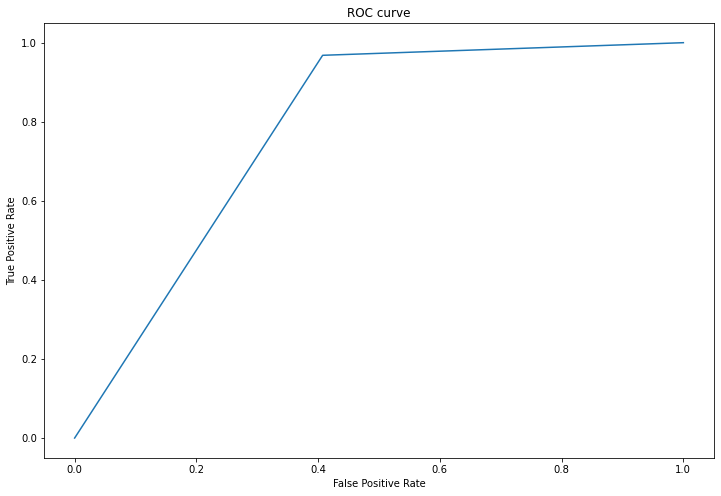

AUC value is 0.7803388494877856 


In [119]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,prediction)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## Tunning for Random Forest Classifier:

In [120]:
## printing Score for Random Forest
rf=RandomForestClassifier()

x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.25,random_state=25)
sm=SMOTE(0.80)
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
rf.fit(x_train_new,y_train_new)
train_lr=rf.predict(x_train)
test_lr=rf.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,test_lr))
print("\n F1 Score for testing is : ", f1_score(y_test,test_lr))
Matrix=confusion_matrix(y_test,test_lr)
print("Confusion Matrix : \n",Matrix)




***********************Testing Scores******************************

Accuracy score for testing is :  0.831081081081081

 F1 Score for testing is :  0.8815165876777251
Confusion Matrix : 
 [[30 16]
 [ 9 93]]


In [125]:
grid_param={'n_estimators':[100,200,300],
           'max_depth':list(range(2,7)),
           'min_samples_split':list(range(2,6)),
           'random_state':list(range(0,5)),
           'criterion':['gini','entropy']}

In [126]:
gcv=GridSearchCV(RandomForestClassifier(),grid_param,cv=3)
gcv.fit(x_train_new,y_train_new)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'random_state': [0, 1, 2, 3, 4]})

In [127]:
print(gcv.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100, 'random_state': 2}


In [128]:
### reassigning the attributes of the model:-
Rf=RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=3,random_state=2,criterion='gini')

Rf.fit(x_train_new,y_train_new)
pred=Rf.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,pred))
print("\n F1 Score for testing is : ", f1_score(y_test,pred))

matrix=confusion_matrix(y_test,pred)
print("Confusion Matrix : \n",matrix)
true_positive=matrix[0][0]
false_positive=matrix[0][1]
false_negative=matrix[1][0]
true_negative=matrix[1][1]
print("True positives are :- " ,true_positive)
print("False positives are :- " ,false_positive)
print("False negatives are :- " ,false_negative)
print("True negatives are :- " ,true_negative)
print("\n The Classification report for Testing \n", classification_report(y_test,pred))




***********************Testing Scores******************************

Accuracy score for testing is :  0.8243243243243243

 F1 Score for testing is :  0.8849557522123893
Confusion Matrix : 
 [[ 22  24]
 [  2 100]]
True positives are :-  22
False positives are :-  24
False negatives are :-  2
True negatives are :-  100

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.92      0.48      0.63        46
           1       0.81      0.98      0.88       102

    accuracy                           0.82       148
   macro avg       0.86      0.73      0.76       148
weighted avg       0.84      0.82      0.81       148



## ROC AUC Score and Curve:-

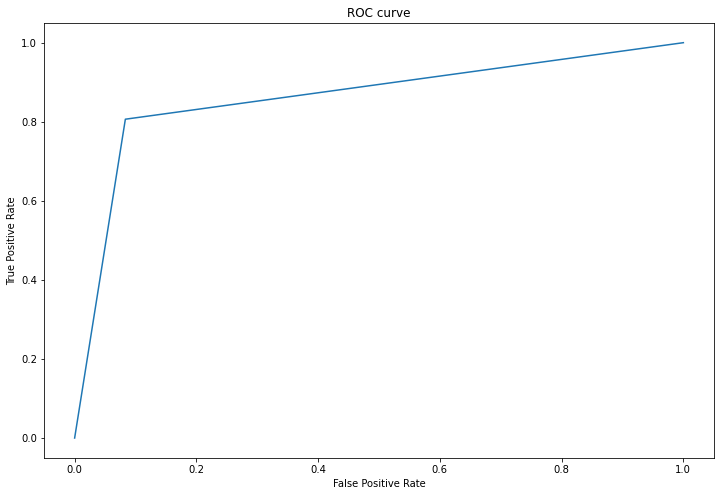

AUC value is 0.8615591397849461 


In [129]:
fpr, tpr, threshold= roc_curve(pred,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

# 3. Tunning for SVC

In [130]:
## printing the score for SVC
svc=SVC()

x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.25,random_state=69)
sm=SMOTE(0.80)
x_train_new,y_train_new=sm.fit_resample(x_train,y_train)
svc.fit(x_train_new,y_train_new)
train_svc=svc.predict(x_train)
test_svc=svc.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,test_svc))
print("\n F1 Score for testing is : ", f1_score(y_test,test_svc))
Matrix=confusion_matrix(y_test,test_svc)
print("Confusion Matrix : \n",Matrix)





***********************Testing Scores******************************

Accuracy score for testing is :  0.8648648648648649

 F1 Score for testing is :  0.9099099099099098
Confusion Matrix : 
 [[ 27  19]
 [  1 101]]


In [131]:
param={'random_state':list(range(3,11)),'max_iter':[100,200,300,400,500,1000],
      'gamma':[0.1,0.01,0.0001,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
      'C':[0.0001,0.001,0.01,1,2,3,4,5]}
search_grid=GridSearchCV(SVC(),param,cv=5)
search_grid.fit(x_train_new,y_train_new)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 2, 3, 4, 5],
                         'gamma': [0.1, 0.01, 0.0001, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1],
                         'max_iter': [100, 200, 300, 400, 500, 1000],
                         'random_state': [3, 4, 5, 6, 7, 8, 9, 10]})

In [132]:
search_grid.best_params_

{'C': 5, 'gamma': 0.6, 'max_iter': 200, 'random_state': 3}

In [133]:
### reassigning the attributes of the model:-
Svc=SVC(random_state=3,max_iter=200,gamma=0.6,C=5)

Svc.fit(x_train_new,y_train_new)
y_prediction=Svc.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,y_prediction))
print("\n F1 Score for testing is : ", f1_score(y_test,y_prediction))

matrix=confusion_matrix(y_test,y_prediction)
print("Confusion Matrix : \n",matrix)
true_positive=matrix[0][0]
false_positive=matrix[0][1]
false_negative=matrix[1][0]
true_negative=matrix[1][1]
print("True positives are :- " ,true_positive)
print("False positives are :- " ,false_positive)
print("False negatives are :- " ,false_negative)
print("True negatives are :- " ,true_negative)
print("\n The Classification report for Testing \n", classification_report(y_test,y_prediction))




***********************Testing Scores******************************

Accuracy score for testing is :  0.7162162162162162

 F1 Score for testing is :  0.7961165048543688
Confusion Matrix : 
 [[24 22]
 [20 82]]
True positives are :-  24
False positives are :-  22
False negatives are :-  20
True negatives are :-  82

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.55      0.52      0.53        46
           1       0.79      0.80      0.80       102

    accuracy                           0.72       148
   macro avg       0.67      0.66      0.66       148
weighted avg       0.71      0.72      0.71       148



## ROC Curve:-

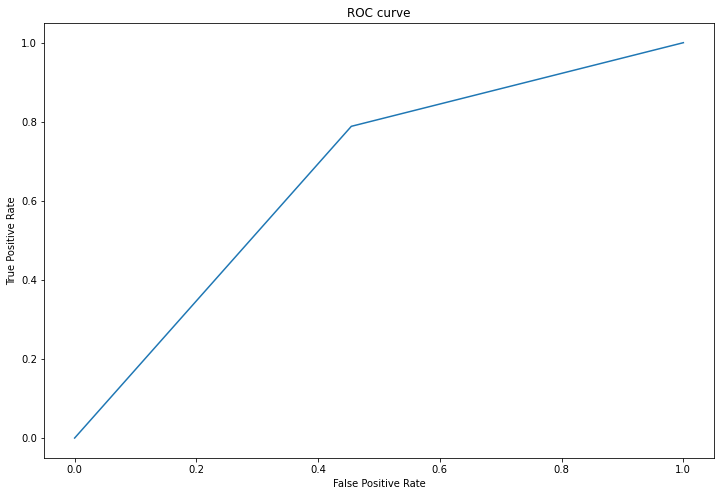

AUC value is 0.6669580419580419 


In [134]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_prediction ,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## `Random Forest gives us the best accuracy and auc roc score as well.`
## `Random Forest is the best fit model for our problem`.

## Saving The  Model:-

In [135]:
import joblib
joblib.dump(Rf,'loan_application_approval_prediction')

['loan_application_approval_prediction']

## Comparing The Actual VS Prediction:-

In [136]:
original=np.array(y_test)
predicted=np.array(Rf.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
143,1,1
144,1,1
145,0,0
146,1,1
